<a href="https://colab.research.google.com/github/SelvaS7/Assignments/blob/main/PROJECT_NO_1_Predictive_Modeling_for_Customer_Purchase_Behavior_A_Logistic_Regression_Approach_Based_on_Age_and_Estimated_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Evaluation Metrics:
Accuracy : 0.8600
Precision: 0.9259
Recall   : 0.6757
F1 Score : 0.7812

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



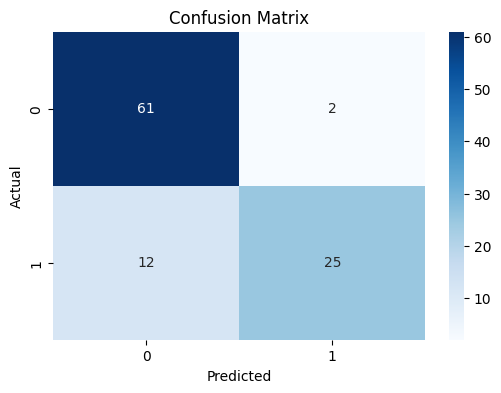


✅ All files saved to your Drive successfully!


In [10]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, classification_report
)

import joblib  # For saving model

# STEP 3: Load Dataset from Google Drive
data_path = '/content/drive/My Drive/PROJECT NO 1/data/Social_Network_Ads.csv'
data = pd.read_csv(data_path)

# Optional: Quick view of dataset
print("Dataset Preview:")
print(data.head())

# STEP 4: Feature Selection (Assuming correct column names)
# If your CSV has different column names, update accordingly.
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# STEP 5: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

# STEP 7: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# STEP 8: Predictions
y_pred = model.predict(X_test)

# STEP 9: Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

# Classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# STEP 10: Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Save confusion matrix to results folder
plt.savefig('/content/drive/My Drive/PROJECT NO 1/results/confusion_matrix.png')
plt.show()

# STEP 11: Save Evaluation Metrics Report
with open('/content/drive/My Drive/PROJECT NO 1/results/evaluation_metrics.txt', 'w') as f:
    f.write("Model: Logistic Regression\n\n")
    f.write(f"Accuracy : {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall   : {recall:.4f}\n")
    f.write(f"F1 Score : {f1:.4f}\n\n")
    f.write("Full Classification Report:\n")
    f.write(report)

# STEP 12: Save Trained Model
joblib.dump(model, '/content/drive/My Drive/PROJECT NO 1/models/logistic_model.pkl')

print("\n✅ All files saved to your Drive successfully!")
